# Embedding Layer

- 자연어를 수치화된 정보로 바꾸기 위한 Layer

- 자연어는 시간의 흐름에 따라서 정보가 연속적으로 이어지는 Sequence Data이다.

- 영어는 Character, 한글은 자소 단위로 쪼갤 수 있다.

    - 더 큰 단위로 띄어쓰기 단위 단어가 있다.
    
    - 또한, 몇 개의 문자를 묶어서 파악하는 n-gram 기법이 있다.
    
- Deep Learning 기법이 발달한 이후, n-gram보다 단어나 문자 단위의 자연어 처리가 많이 쓰인다.

- Embedding Layer보다 쉬운 기법

    - 자연어를 구성하는 단위에 대해 정수 인덱스를 저장
    
    - 이후, One-Hot Encoding을 이용해 단어의 인덱스에 해당하는 원소만 1이고, 나머지는 0인 배열로 바꾼다
    
        - 그런데, 이는 사용하는 메모리에 비해 너무 적은 정보를 표현하는 단점이 존재한다.
        
    - Embedding Layer는 한정된 길이의 벡터로 자연어의 구성 단위인 자소, 문자, 단어, n-gram 등을 표현할 수 있다.
    
- Embedding Layer는 한정된 벡터에 임의의 실수가 들어간다.

    - 실수는 연속적이기 때문에, 이론상 무한개의 단어를 표현할 수 있다.
    
    - Embedding의 차원 수를 늘리면, 표현의 품질이 더욱 좋아진다.
    
    - 보통 Embedding 차원으로 200 ~ 500 사이를 사용한다.
    
- Embedding Layer는 정수 인덱스를 Word Embedding으로 바꾸는 역할을 하기 때문에, 정수 인덱스는 Embedding Layer의 입력이 된다.

- Embedding Layer의 행과 각 Word Embedding은 동일한 값을 가진다.

    - 사실 Embedding Layer는 정수 인덱스에 저장된 단어의 수 만큼 Word Embedding을 가지고 있다가 필요할 때 꺼내쓸 수 있는 저장 공간과 같다.
    
    - 하지만, 자연어에는 미리 정해놓을 수 없을 정도로 많은 단어가 존재한다.
    
    - 때문에, 정수 인덱스로 저장하지 않는 단어에 대한 Embedding 값을 별도로 마련해둔다.
    
        - Ex). Embedding Layer의 행이 10,000개 라면, 9,999개는 미리 지정한 단어의 개수이고, 나머지 1개는 UNK(Unknown) 값이다.
        
        - 때로는 공백을 의미하는 Padding 값을 위한 Index를 하나 더 확보해야 할 때도 있다.
        
- Embedding Layer를 학습시키는 방법에는 여러가지가 존재한다.

    - Word2Vec
    
    - GloVe
    
    - FastText
    
    - ELMo
    
    - 등의 방법이 있으며, 미리 훈련된 Embedding Layer의 가중치를 불러와서 사용하면 학습 시간을 절약할 수 있다.

# Sentiment Analysis

### 긍정/부정 감성분석

- Sentiment Analysis는 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제이다.

- Polarity(극성) 감성 분석은 문장의 긍정/부정 혹은 긍정/중립/부정을 분류한다.

- 리뷰 데이터는 Labeling이 쉽기 때문에 극성 감성 분석에 쉽게 적용된다.

- Naver의 박은정 박사가 발표한 ≪Naver sentiment movie corpus v1.0≫을 이용해서 감성 분석을 해보자.

    - 훈련 데이터 15만 개
    
    - 테스트 데이터 5만 개

In [2]:
import tensorflow as tf
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 1s 0us/step


In [3]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [4]:
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [6]:
import numpy as np
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [7]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


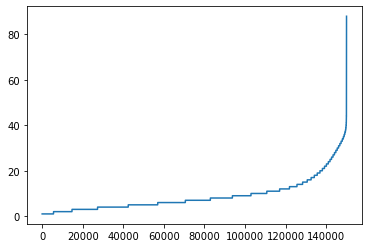

142587


In [8]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [10]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

# sentences의 세번째의 단어인 '너무재밓었'은 빈도수 상위 20,000개에 들지 못하여 Padding과 같은 0으로 처리되었다.
print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [12]:
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [16]:
import tensorflow as tf

# 각 문장에 들어있는 25개의 단어를 길이 300의 Embedding Vector로 변환
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 67s 557us/sample - loss: 0.4346 - accuracy: 0.7845 - val_loss: 0.3795 - val_accuracy: 0.8223
Epoch 2/5
120000/120000 [==============================] - 66s 554us/sample - loss: 0.3250 - accuracy: 0.8471 - val_loss: 0.3864 - val_accuracy: 0.8194
Epoch 3/5
120000/120000 [==============================] - 67s 554us/sample - loss: 0.2716 - accuracy: 0.8700 - val_loss: 0.4196 - val_accuracy: 0.8189
Epoch 4/5
120000/120000 [==============================] - 67s 556us/sample - loss: 0.2279 - accuracy: 0.8891 - val_loss: 0.4949 - val_accuracy: 0.8161
Epoch 5/5
120000/120000 [==============================] - 67s 555us/sample - loss: 0.1930 - accuracy: 0.9041 - val_loss: 0.5523 - val_accuracy: 0.8090


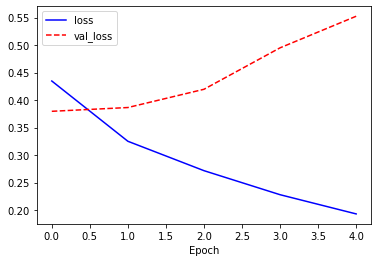

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

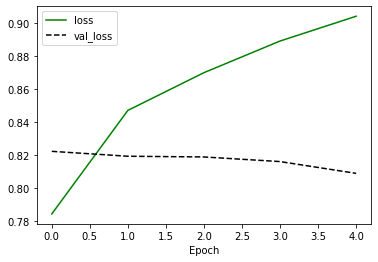

In [20]:
plt.plot(history.history['accuracy'], 'g-', label='loss')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- Overfitting이 나고있는 것을 볼 수 있다.

- 이는 Embedding Layer를 랜덤한 값에서부터 학습시키기 때문에, 각 단어를 나타내는 Vector의 품질이 좋지 않기 때문이다.

    - 이를 개선하기 위한 방법
        
        - Embedding Layer를 별도로 학습시켜서 Network에 불러와서 사용한다.
        
        - RNN이 아닌 CNN을 사용한다.

In [21]:
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.5705445374917985, 0.80116]

In [34]:
test_sentence = '재미없는 영화'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미없는']
[0.9980102  0.00198976]
['재미없는', '영화']
[0.99817955 0.00182041]
